In [305]:
library(foreign)
library(poLCA)
library(dplyr)
library(scatterplot3d)
library(cluster)
library(caret)
library(tree)
library(e1071)
library(plyr)
library(rpart)
library(rpart.plot)
library(calibrate)
library(car)
library(nnet)
library(ResourceSelection)

In [306]:
setwd("D:/Lancaster University/Modules/Statistical learning/coursework task-20180209") 
patient <- read.table("patient.dat", header = TRUE)
#View(patient)
dim(patient)#381  25
names(patient)

[1] 380  25

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"  "GENDER"   "AGE"     
[25] "LIVEWITH"

In [307]:
patient_clus<- select(patient, WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2)
names(patient_clus)
patient_clus<- na.omit(patient_clus)
dim(patient_clus)#302 22  
head(patient_clus)

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"

[1] 302  22

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
3,3,2,3,3,2,1,1,1,1,...,2,3,1,1,2,1,1,3,2,3
4,4,4,4,4,4,1,2,2,2,...,3,3,3,3,3,3,3,2,3,3
4,4,4,2,4,2,1,1,1,1,...,2,3,2,2,2,2,3,3,4,1
4,3,3,3,3,4,2,1,1,1,...,4,4,4,4,4,4,4,3,3,2
3,3,1,3,3,4,2,2,1,1,...,2,3,3,2,3,3,3,3,3,1
2,2,2,2,3,1,2,1,1,3,...,1,1,1,2,1,2,2,3,2,1


In [308]:
patient_clusbi<- patient_clus
#WORK2
patient_clusbi$WORK2[patient_clusbi$WORK2==1 | patient_clusbi$WORK2==2] <- "1"
patient_clusbi$WORK2[patient_clusbi$WORK2==3 | patient_clusbi$WORK2==4] <- "2"
#HOBBY2
patient_clusbi$HOBBY2[patient_clusbi$HOBBY2==1 | patient_clusbi$HOBBY2==2] <- "1"
patient_clusbi$HOBBY2[patient_clusbi$HOBBY2==3 | patient_clusbi$HOBBY2==4] <- "2"
#BREATH2
patient_clusbi$BREATH2[patient_clusbi$BREATH2==1 | patient_clusbi$BREATH2==2] <- "1"
patient_clusbi$BREATH2[patient_clusbi$BREATH2==3 | patient_clusbi$BREATH2==4] <- "2"
#PAIN2
patient_clusbi$PAIN2[patient_clusbi$PAIN2==1 | patient_clusbi$PAIN2==2] <- "1"
patient_clusbi$PAIN2[patient_clusbi$PAIN2==3 | patient_clusbi$PAIN2==4] <- "2"
#REST2
patient_clusbi$REST2[patient_clusbi$REST2==1 | patient_clusbi$REST2==2] <- "1"
patient_clusbi$REST2[patient_clusbi$REST2==3 | patient_clusbi$REST2==4] <- "2"
#SLEEP2
patient_clusbi$SLEEP2[patient_clusbi$SLEEP2==1 | patient_clusbi$SLEEP2==2] <- "1"
patient_clusbi$SLEEP2[patient_clusbi$SLEEP2==3 | patient_clusbi$SLEEP2==4] <- "2"
#APPET2
patient_clusbi$APPET2[patient_clusbi$APPET2==1 | patient_clusbi$APPET2==2] <- "1"
patient_clusbi$APPET2[patient_clusbi$APPET2==3 | patient_clusbi$APPET2==4] <- "2"
#NAUSEA2
patient_clusbi$NAUSEA2[patient_clusbi$NAUSEA2==1 | patient_clusbi$NAUSEA2==2] <- "1"
patient_clusbi$NAUSEA2[patient_clusbi$NAUSEA2==3 | patient_clusbi$NAUSEA2==4] <- "2"
#VOMIT2
patient_clusbi$VOMIT2[patient_clusbi$VOMIT2==1 | patient_clusbi$VOMIT2==2] <- "1"
patient_clusbi$VOMIT2[patient_clusbi$VOMIT2==3 | patient_clusbi$VOMIT2==4] <- "2"
#CONST2
patient_clusbi$CONST2[patient_clusbi$CONST2==1 | patient_clusbi$CONST2==2] <- "1"
patient_clusbi$CONST2[patient_clusbi$CONST2==3 | patient_clusbi$CONST2==4] <- "2"
#DIARR2
patient_clusbi$DIARR2[patient_clusbi$DIARR2==1 | patient_clusbi$DIARR2==2] <- "1"
patient_clusbi$DIARR2[patient_clusbi$DIARR2==3 | patient_clusbi$DIARR2==4] <- "2"
#TIRED2
patient_clusbi$TIRED2[patient_clusbi$TIRED2==1 | patient_clusbi$TIRED2==2] <- "1"
patient_clusbi$TIRED2[patient_clusbi$TIRED2==3 | patient_clusbi$TIRED2==4] <- "2"
#PAINADL2
patient_clusbi$PAINADL2[patient_clusbi$PAINADL2==1 | patient_clusbi$PAINADL2==2] <- "1"
patient_clusbi$PAINADL2[patient_clusbi$PAINADL2==3 | patient_clusbi$PAINADL2==4] <- "2"
#CONCEN2
patient_clusbi$CONCEN2[patient_clusbi$CONCEN2==1 | patient_clusbi$CONCEN2==2] <- "1"
patient_clusbi$CONCEN2[patient_clusbi$CONCEN2==3 | patient_clusbi$CONCEN2==4] <- "2"
#TENSE2
patient_clusbi$TENSE2[patient_clusbi$TENSE2==1 | patient_clusbi$TENSE2==2] <- "1"
patient_clusbi$TENSE2[patient_clusbi$TENSE2==3 | patient_clusbi$TENSE2==4] <- "2"
#WORRY2
patient_clusbi$WORRY2[patient_clusbi$WORRY2==1 | patient_clusbi$WORRY2==2] <- "1"
patient_clusbi$WORRY2[patient_clusbi$WORRY2==3 | patient_clusbi$WORRY2==4] <- "2"
#IRRIT2
patient_clusbi$IRRIT2[patient_clusbi$IRRIT2==1 | patient_clusbi$IRRIT2==2] <- "1"
patient_clusbi$IRRIT2[patient_clusbi$IRRIT2==3 | patient_clusbi$IRRIT2==4] <- "2"
#DEPRES2
patient_clusbi$DEPRES2[patient_clusbi$DEPRES2==1 | patient_clusbi$DEPRES2==2] <- "1"
patient_clusbi$DEPRES2[patient_clusbi$DEPRES2==3 | patient_clusbi$DEPRES2==4] <- "2"
#REMEM2
patient_clusbi$REMEM2[patient_clusbi$REMEM2==1 | patient_clusbi$REMEM2==2] <- "1"
patient_clusbi$REMEM2[patient_clusbi$REMEM2==3 | patient_clusbi$REMEM2==4] <- "2"
#FAMILY2
patient_clusbi$FAMILY2[patient_clusbi$FAMILY2==1 | patient_clusbi$FAMILY2==2] <- "1"
patient_clusbi$FAMILY2[patient_clusbi$FAMILY2==3 | patient_clusbi$FAMILY2==4] <- "2"
#SOCIAL2
patient_clusbi$SOCIAL2[patient_clusbi$SOCIAL2==1 | patient_clusbi$SOCIAL2==2] <- "1"
patient_clusbi$SOCIAL2[patient_clusbi$SOCIAL2==3 | patient_clusbi$SOCIAL2==4] <- "2"
#FINANC2
patient_clusbi$FINANC2[patient_clusbi$FINANC2==1 | patient_clusbi$FINANC2==2] <- "1"
patient_clusbi$FINANC2[patient_clusbi$FINANC2==3 | patient_clusbi$FINANC2==4] <- "2"
head(patient_clusbi)

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
2,2,1,2,2,1,1,1,1,1,...,1,2,1,1,1,1,1,2,1,2
2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,2,2,2,1,2,2
2,2,2,1,2,1,1,1,1,1,...,1,2,1,1,1,1,2,2,2,1
2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
2,2,1,2,2,2,1,1,1,1,...,1,2,2,1,2,2,2,2,2,1
1,1,1,1,2,1,1,1,1,2,...,1,1,1,1,1,1,1,2,1,1


In [309]:
#WORK2
patient_clusbi$WORK2<- as.numeric(patient_clusbi$WORK2)
#HOBBY2
patient_clusbi$HOBBY2<- as.numeric(patient_clusbi$HOBBY2)
#BREATH2
patient_clusbi$BREATH2<- as.numeric(patient_clusbi$BREATH2)
#PAIN2
patient_clusbi$PAIN2<- as.numeric(patient_clusbi$PAIN2)
#REST2
patient_clusbi$REST2<- as.numeric(patient_clusbi$REST2)
#SLEEP2
patient_clusbi$SLEEP2<- as.numeric(patient_clusbi$SLEEP2)
#APPET2
patient_clusbi$APPET2<- as.numeric(patient_clusbi$APPET2)
#NAUSEA2
patient_clusbi$NAUSEA2<- as.numeric(patient_clusbi$NAUSEA2)
#VOMIT2
patient_clusbi$VOMIT2<- as.numeric(patient_clusbi$VOMIT2)
#CONST2
patient_clusbi$CONST2<- as.numeric(patient_clusbi$CONST2)
#DIARR2
patient_clusbi$DIARR2<- as.numeric(patient_clusbi$DIARR2)
#TIRED2
patient_clusbi$TIRED2<- as.numeric(patient_clusbi$TIRED2)
#PAINADL2
patient_clusbi$PAINADL2<- as.numeric(patient_clusbi$PAINADL2)
#CONCEN2
patient_clusbi$CONCEN2<- as.numeric(patient_clusbi$CONCEN2)
#TENSE2
patient_clusbi$TENSE2<- as.numeric(patient_clusbi$TENSE2)
#WORRY2
patient_clusbi$WORRY2<- as.numeric(patient_clusbi$WORRY2)
#IRRIT2
patient_clusbi$IRRIT2<- as.numeric(patient_clusbi$IRRIT2)
#DEPRES2
patient_clusbi$DEPRES2<- as.numeric(patient_clusbi$DEPRES2)
#REMEM2
patient_clusbi$REMEM2<- as.numeric(patient_clusbi$REMEM2)
#FAMILY2
patient_clusbi$FAMILY2<- as.numeric(patient_clusbi$FAMILY2)
#SOCIAL2
patient_clusbi$SOCIAL2<- as.numeric(patient_clusbi$SOCIAL2)
#FINANC2
patient_clusbi$FINANC2<- as.numeric(patient_clusbi$FINANC2)

In [310]:
set.seed(42)
pbind=cbind(WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,DIARR2,TIRED2,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2)~1
pbind

cbind(WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, 
    VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, 
    WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2) ~ 
    1

In [311]:
k2=poLCA(pbind, data=patient_clusbi, nclass=2,  maxiter=200, nrep =50,verbose=F)

In [312]:
k2$bic#5921.20438800557

[1] 5921.204

In [313]:
k3=poLCA(pbind, data=patient_clusbi, nclass=3, maxiter=200, nrep =50,verbose=F)

In [314]:
k3$bic#5738.66006190546

[1] 5738.66

In [315]:
k4=poLCA(pbind, data=patient_clusbi, nclass=4, maxiter=200, nrep =50,verbose=F)

In [316]:
k4$bic #5726.57282290333

[1] 5726.573

In [317]:
k5=poLCA(pbind, data=patient_clusbi, nclass=5, maxiter=200, nrep =50,verbose=F)

In [318]:
k5$bic#5749.20947996148

[1] 5749.209

In [320]:
k6=poLCA(pbind, data=patient_clusbi, nclass=6, maxiter=200, nrep =50,verbose=F)

In [321]:
k6$bic#5817.56

[1] 5817.564

In [ ]:
k7=poLCA(pbind, data=patient_clusbi, nclass=7, maxiter=200, nrep =50,verbose=F)

In [ ]:
k7$bic#5891.52232940461

In [ ]:
k8=poLCA(pbind, data=patient_clusbi, nclass=8, maxiter=200, nrep =50,verbose=F)

In [ ]:
k8$bic#5865.80201704499

In [ ]:
k9=poLCA(pbind, data=patient_clusbi, nclass=9, maxiter=200, nrep =50,verbose=F)

In [ ]:
k9$bic

In [324]:
k4

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$WORK2
           Pr(1)  Pr(2)
class 1:  0.8754 0.1246
class 2:  0.0000 1.0000
class 3:  0.1882 0.8118
class 4:  0.7725 0.2275

$HOBBY2
           Pr(1)  Pr(2)
class 1:  0.9224 0.0776
class 2:  0.0664 0.9336
class 3:  0.2040 0.7960
class 4:  0.7877 0.2123

$BREATH2
           Pr(1)  Pr(2)
class 1:  0.9495 0.0505
class 2:  0.4928 0.5072
class 3:  0.7982 0.2018
class 4:  0.8212 0.1788

$PAIN2
           Pr(1)  Pr(2)
class 1:  0.9656 0.0344
class 2:  0.3246 0.6754
class 3:  0.6505 0.3495
class 4:  0.7906 0.2094

$REST2
           Pr(1)  Pr(2)
class 1:  0.9296 0.0704
class 2:  0.0155 0.9845
class 3:  0.1935 0.8065
class 4:  0.8064 0.1936

$SLEEP2
           Pr(1)  Pr(2)
class 1:  0.8818 0.1182
class 2:  0.1675 0.8325
class 3:  0.8396 0.1604
class 4:  0.6763 0.3237

$APPET2
           Pr(1)  Pr(2)
class 1:  0.9656 0.0344
class 2:  0.6048 0.3952
class 3:  0.8259 0.1741
class 4:  0.8210 0.1790

$NA

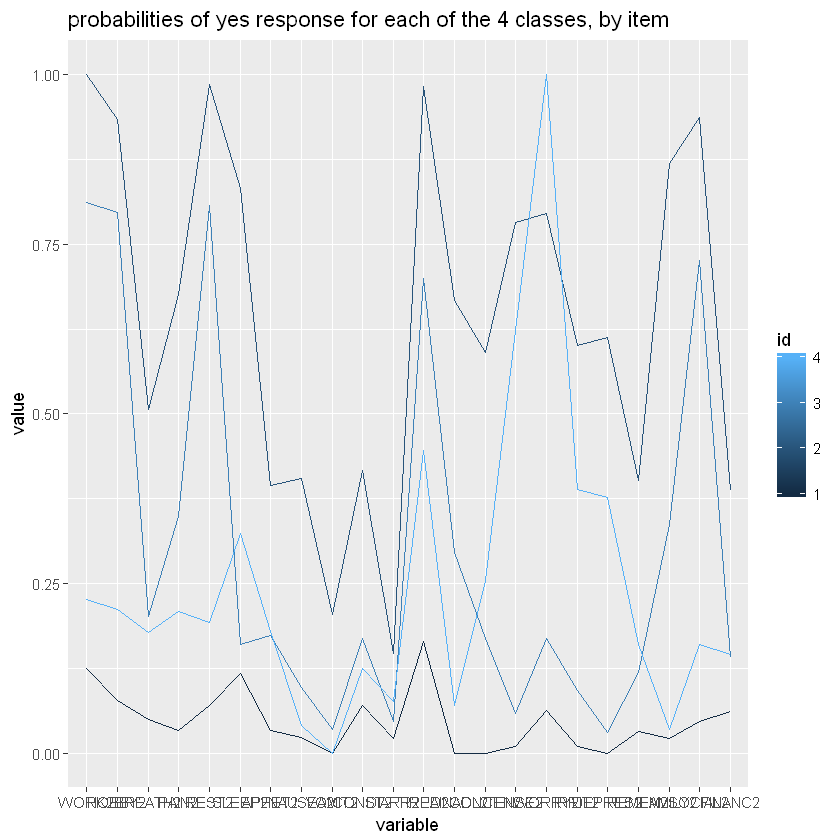

In [326]:
#Plotting the probabilities of yes for each of the 13 items is not easy. Here is how i do it in R, using a parallel coordinate plot (Lecture 5).
library(GGally)
cb=cbind(k4$probs[[1]][,2], k4$probs[[2]][,2],k4$probs[[3]][,2],
         k4$probs[[4]][,2], k4$probs[[5]][,2], k4$probs[[6]][,2],
         k4$probs[[7]][,2], k4$probs[[8]][,2], k4$probs[[9]][,2],
         k4$probs[[10]][,2],k4$probs[[11]][,2], k4$probs[[12]][,2],
         k4$probs[[13]][,2],k4$probs[[14]][,2], k4$probs[[15]][,2],
         k4$probs[[16]][,2],k4$probs[[17]][,2], k4$probs[[18]][,2],
         k4$probs[[19]][,2],k4$probs[[20]][,2], k4$probs[[21]][,2],
         k4$probs[[22]][,2], factor(c(1,2,3,4))) 
colnames(cb)=c("WORK2", "HOBBY2","BREATH2","PAIN2","REST2","SLEEP2","APPET2","NAUSEA2","VOMIT2","CONST2","DIARR2","TIRED2","PAINADL2","CONCEN2","TENSE2","WORRY2","IRRIT2","DEPRES2","REMEM2","FAMILY2","SOCIAL2","FINANC2","id")
ggparcoord(cb,columns=1:22, groupColumn="id", scale = 'globalminmax', title="probabilities of yes response for each of the 4 classes, by item")

In [325]:
cb

,WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2,id
class 1:,0.1245543,0.07760686,0.05047878,0.03439332,0.07035462,0.1182202,0.03435888,0.02293055,1.539501e-239,0.07034686,...,2.970671e-143,0.01035005,0.06298239,0.01055568,2.472201e-193,0.03258175,0.02147263,0.04649237,0.06150421,1
class 2:,1.0000000,0.93364403,0.50718120,0.67536309,0.98448939,0.8325242,0.39515654,0.40533414,2.042155e-01,0.41656129,...,5.906292e-01,0.78129630,0.79580193,0.60054357,6.123311e-01,0.40136862,0.86876499,0.93587822,0.38735305,2
class 3:,0.8117790,0.79600403,0.20180139,0.34951925,0.80648027,0.1603710,0.17411767,0.09705306,3.480891e-02,0.16995653,...,1.700505e-01,0.05965621,0.16960440,0.09244208,3.076462e-02,0.11886206,0.33769144,0.72564143,0.14082509,3
class 4:,0.2274916,0.21228087,0.17876620,0.20935022,0.19361488,0.3236627,0.17899783,0.04062504,9.626996e-203,0.12488166,...,2.547000e-01,0.62224865,1.00000000,0.38805982,3.772896e-01,0.15998064,0.03571455,0.16051861,0.14519883,4


In [ ]:
k4$P

In [333]:
patient_clus2<- na.omit(patient)
dim(patient_clus2)
patient_clusbi2<- patient_clus2
#WORK2
patient_clusbi2$WORK2[patient_clusbi2$WORK2==1 | patient_clusbi2$WORK2==2] <- "1"
patient_clusbi2$WORK2[patient_clusbi2$WORK2==3 | patient_clusbi2$WORK2==4] <- "2"
#HOBBY2
patient_clusbi2$HOBBY2[patient_clusbi2$HOBBY2==1 | patient_clusbi2$HOBBY2==2] <- "1"
patient_clusbi2$HOBBY2[patient_clusbi2$HOBBY2==3 | patient_clusbi2$HOBBY2==4] <- "2"
#BREATH2
patient_clusbi2$BREATH2[patient_clusbi2$BREATH2==1 | patient_clusbi2$BREATH2==2] <- "1"
patient_clusbi2$BREATH2[patient_clusbi2$BREATH2==3 | patient_clusbi2$BREATH2==4] <- "2"
#PAIN2
patient_clusbi2$PAIN2[patient_clusbi2$PAIN2==1 | patient_clusbi2$PAIN2==2] <- "1"
patient_clusbi2$PAIN2[patient_clusbi2$PAIN2==3 | patient_clusbi2$PAIN2==4] <- "2"
#REST2
patient_clusbi2$REST2[patient_clusbi2$REST2==1 | patient_clusbi2$REST2==2] <- "1"
patient_clusbi2$REST2[patient_clusbi2$REST2==3 | patient_clusbi2$REST2==4] <- "2"
#SLEEP2
patient_clusbi2$SLEEP2[patient_clusbi2$SLEEP2==1 | patient_clusbi2$SLEEP2==2] <- "1"
patient_clusbi2$SLEEP2[patient_clusbi2$SLEEP2==3 | patient_clusbi2$SLEEP2==4] <- "2"
#APPET2
patient_clusbi2$APPET2[patient_clusbi2$APPET2==1 | patient_clusbi2$APPET2==2] <- "1"
patient_clusbi2$APPET2[patient_clusbi2$APPET2==3 | patient_clusbi2$APPET2==4] <- "2"
#NAUSEA2
patient_clusbi2$NAUSEA2[patient_clusbi2$NAUSEA2==1 | patient_clusbi2$NAUSEA2==2] <- "1"
patient_clusbi2$NAUSEA2[patient_clusbi2$NAUSEA2==3 | patient_clusbi2$NAUSEA2==4] <- "2"
#VOMIT2
patient_clusbi2$VOMIT2[patient_clusbi2$VOMIT2==1 | patient_clusbi2$VOMIT2==2] <- "1"
patient_clusbi2$VOMIT2[patient_clusbi2$VOMIT2==3 | patient_clusbi2$VOMIT2==4] <- "2"
#CONST2
patient_clusbi2$CONST2[patient_clusbi2$CONST2==1 | patient_clusbi2$CONST2==2] <- "1"
patient_clusbi2$CONST2[patient_clusbi2$CONST2==3 | patient_clusbi2$CONST2==4] <- "2"
#DIARR2
patient_clusbi2$DIARR2[patient_clusbi2$DIARR2==1 | patient_clusbi2$DIARR2==2] <- "1"
patient_clusbi2$DIARR2[patient_clusbi2$DIARR2==3 | patient_clusbi2$DIARR2==4] <- "2"
#TIRED2
patient_clusbi2$TIRED2[patient_clusbi2$TIRED2==1 | patient_clusbi2$TIRED2==2] <- "1"
patient_clusbi2$TIRED2[patient_clusbi2$TIRED2==3 | patient_clusbi2$TIRED2==4] <- "2"
#PAINADL2
patient_clusbi2$PAINADL2[patient_clusbi2$PAINADL2==1 | patient_clusbi2$PAINADL2==2] <- "1"
patient_clusbi2$PAINADL2[patient_clusbi2$PAINADL2==3 | patient_clusbi2$PAINADL2==4] <- "2"
#CONCEN2
patient_clusbi2$CONCEN2[patient_clusbi2$CONCEN2==1 | patient_clusbi2$CONCEN2==2] <- "1"
patient_clusbi2$CONCEN2[patient_clusbi2$CONCEN2==3 | patient_clusbi2$CONCEN2==4] <- "2"
#TENSE2
patient_clusbi2$TENSE2[patient_clusbi2$TENSE2==1 | patient_clusbi2$TENSE2==2] <- "1"
patient_clusbi2$TENSE2[patient_clusbi2$TENSE2==3 | patient_clusbi2$TENSE2==4] <- "2"
#WORRY2
patient_clusbi2$WORRY2[patient_clusbi2$WORRY2==1 | patient_clusbi2$WORRY2==2] <- "1"
patient_clusbi2$WORRY2[patient_clusbi2$WORRY2==3 | patient_clusbi2$WORRY2==4] <- "2"
#IRRIT2
patient_clusbi2$IRRIT2[patient_clusbi2$IRRIT2==1 | patient_clusbi2$IRRIT2==2] <- "1"
patient_clusbi2$IRRIT2[patient_clusbi2$IRRIT2==3 | patient_clusbi2$IRRIT2==4] <- "2"
#DEPRES2
patient_clusbi2$DEPRES2[patient_clusbi2$DEPRES2==1 | patient_clusbi2$DEPRES2==2] <- "1"
patient_clusbi2$DEPRES2[patient_clusbi2$DEPRES2==3 | patient_clusbi2$DEPRES2==4] <- "2"
#REMEM2
patient_clusbi2$REMEM2[patient_clusbi2$REMEM2==1 | patient_clusbi2$REMEM2==2] <- "1"
patient_clusbi2$REMEM2[patient_clusbi2$REMEM2==3 | patient_clusbi2$REMEM2==4] <- "2"
#FAMILY2
patient_clusbi2$FAMILY2[patient_clusbi2$FAMILY2==1 | patient_clusbi2$FAMILY2==2] <- "1"
patient_clusbi2$FAMILY2[patient_clusbi2$FAMILY2==3 | patient_clusbi2$FAMILY2==4] <- "2"
#SOCIAL2
patient_clusbi2$SOCIAL2[patient_clusbi2$SOCIAL2==1 | patient_clusbi2$SOCIAL2==2] <- "1"
patient_clusbi2$SOCIAL2[patient_clusbi2$SOCIAL2==3 | patient_clusbi2$SOCIAL2==4] <- "2"
#FINANC2
patient_clusbi2$FINANC2[patient_clusbi2$FINANC2==1 | patient_clusbi2$FINANC2==2] <- "1"
patient_clusbi2$FINANC2[patient_clusbi2$FINANC2==3 | patient_clusbi2$FINANC2==4] <- "2"
head(patient_clusbi)
#WORK2
patient_clusbi2$WORK2<- as.numeric(patient_clusbi2$WORK2)
#HOBBY2
patient_clusbi2$HOBBY2<- as.numeric(patient_clusbi2$HOBBY2)
#BREATH2
patient_clusbi2$BREATH2<- as.numeric(patient_clusbi2$BREATH2)
#PAIN2
patient_clusbi2$PAIN2<- as.numeric(patient_clusbi2$PAIN2)
#REST2
patient_clusbi2$REST2<- as.numeric(patient_clusbi2$REST2)
#SLEEP2
patient_clusbi2$SLEEP2<- as.numeric(patient_clusbi2$SLEEP2)
#APPET2
patient_clusbi2$APPET2<- as.numeric(patient_clusbi2$APPET2)
#NAUSEA2
patient_clusbi2$NAUSEA2<- as.numeric(patient_clusbi2$NAUSEA2)
#VOMIT2
patient_clusbi2$VOMIT2<- as.numeric(patient_clusbi2$VOMIT2)
#CONST2
patient_clusbi2$CONST2<- as.numeric(patient_clusbi2$CONST2)
#DIARR2
patient_clusbi2$DIARR2<- as.numeric(patient_clusbi2$DIARR2)
#TIRED2
patient_clusbi2$TIRED2<- as.numeric(patient_clusbi2$TIRED2)
#PAINADL2
patient_clusbi2$PAINADL2<- as.numeric(patient_clusbi2$PAINADL2)
#CONCEN2
patient_clusbi2$CONCEN2<- as.numeric(patient_clusbi2$CONCEN2)
#TENSE2
patient_clusbi2$TENSE2<- as.numeric(patient_clusbi2$TENSE2)
#WORRY2
patient_clusbi2$WORRY2<- as.numeric(patient_clusbi2$WORRY2)
#IRRIT2
patient_clusbi2$IRRIT2<- as.numeric(patient_clusbi2$IRRIT2)
#DEPRES2
patient_clusbi2$DEPRES2<- as.numeric(patient_clusbi2$DEPRES2)
#REMEM2
patient_clusbi2$REMEM2<- as.numeric(patient_clusbi2$REMEM2)
#FAMILY2
patient_clusbi2$FAMILY2<- as.numeric(patient_clusbi2$FAMILY2)
#SOCIAL2
patient_clusbi2$SOCIAL2<- as.numeric(patient_clusbi2$SOCIAL2)
#FINANC2
patient_clusbi2$FINANC2<- as.numeric(patient_clusbi2$FINANC2)
dim(patient_clusbi2)
names(patient_clusbi2)

[1] 295  25

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
2,2,1,2,2,1,1,1,1,1,...,1,2,1,1,1,1,1,2,1,2
2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,2,2,2,1,2,2
2,2,2,1,2,1,1,1,1,1,...,1,2,1,1,1,1,2,2,2,1
2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
2,2,1,2,2,2,1,1,1,1,...,1,2,2,1,2,2,2,2,2,1
1,1,1,1,2,1,1,1,1,2,...,1,1,1,1,1,1,1,2,1,1


[1] 295  25

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"  "GENDER"   "AGE"     
[25] "LIVEWITH"

In [334]:
pbind_gender=cbind(WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,DIARR2,TIRED2,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2)~GENDER
pbind_gender

cbind(WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, 
    VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, 
    WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2) ~ 
    GENDER

In [335]:
kg2=poLCA(pbind_gender, data=patient_clusbi2, nclass=2, maxiter=200, nrep =50,verbose=F)
kg2$bic#5798.43022801817

[1] 5798.43

In [336]:
kg3=poLCA(pbind_gender, data=patient_clusbi2, nclass=3, maxiter=200, nrep =50,verbose=F)

In [337]:
kg3$bic #5631.38070151742

[1] 5631.381

In [338]:
kg4=poLCA(pbind_gender, data=patient_clusbi2, nclass=4, maxiter=200, nrep =50,verbose=F)

In [339]:
kg4$bic#5621.28956775403---------------->best

[1] 5621.29

In [341]:
kg5=poLCA(pbind_gender, data=patient_clusbi2, nclass=5, maxiter=200, nrep =50,verbose=F)
kg5$bic

Warning message in sqrt(diag(VCE.beta)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.mix)):
"Se han producido NaNs"

[1] 5644.845

In [342]:
kg6=poLCA(pbind_gender, data=patient_clusbi2, nclass=6, maxiter=200, nrep =50,verbose=F)
kg6$bic

Warning message in sqrt(diag(VCE.beta)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.mix)):
"Se han producido NaNs"

[1] 5736.081

In [343]:
kg4

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$WORK2
           Pr(1)  Pr(2)
class 1:  0.1954 0.8046
class 2:  0.0000 1.0000
class 3:  0.7475 0.2525
class 4:  0.8894 0.1106

$HOBBY2
           Pr(1)  Pr(2)
class 1:  0.2093 0.7907
class 2:  0.0736 0.9264
class 3:  0.7683 0.2317
class 4:  0.9255 0.0745

$BREATH2
           Pr(1)  Pr(2)
class 1:  0.7932 0.2068
class 2:  0.4888 0.5112
class 3:  0.8146 0.1854
class 4:  0.9574 0.0426

$PAIN2
           Pr(1)  Pr(2)
class 1:  0.6673 0.3327
class 2:  0.3256 0.6744
class 3:  0.7633 0.2367
class 4:  0.9656 0.0344

$REST2
           Pr(1)  Pr(2)
class 1:  0.2083 0.7917
class 2:  0.0000 1.0000
class 3:  0.7880 0.2120
class 4:  0.9310 0.0690

$SLEEP2
           Pr(1)  Pr(2)
class 1:  0.8438 0.1562
class 2:  0.1743 0.8257
class 3:  0.6574 0.3426
class 4:  0.8843 0.1157

$APPET2
           Pr(1)  Pr(2)
class 1:  0.8230 0.1770
class 2:  0.5980 0.4020
class 3:  0.8007 0.1993
class 4:  0.9775 0.0225

$NA

In [344]:
pbind_age=cbind(WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,DIARR2,TIRED2,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2)~AGE
pbind_age

cbind(WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, 
    VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, 
    WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2) ~ 
    AGE

In [345]:
ka2=poLCA(pbind_age, data=patient_clusbi2, nclass=2, maxiter=200, nrep =50,verbose=F)
ka2$bic

[1] 5798.056

In [346]:
ka3=poLCA(pbind_age, data=patient_clusbi2, nclass=3, maxiter=200, nrep =50,verbose=F)
ka3$bic

[1] 5627.866

In [347]:
ka4=poLCA(pbind_age, data=patient_clusbi2, nclass=4, maxiter=200, nrep =50,verbose=F)
ka4$bic #5622.74341493913----->best

[1] 5622.743

In [350]:
ka4

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$WORK2
           Pr(1)  Pr(2)
class 1:  0.7873 0.2127
class 2:  0.8854 0.1146
class 3:  0.0000 1.0000
class 4:  0.1939 0.8061

$HOBBY2
           Pr(1)  Pr(2)
class 1:  0.8053 0.1947
class 2:  0.9219 0.0781
class 3:  0.0717 0.9283
class 4:  0.2103 0.7897

$BREATH2
           Pr(1)  Pr(2)
class 1:  0.8207 0.1793
class 2:  0.9594 0.0406
class 3:  0.4911 0.5089
class 4:  0.7902 0.2098

$PAIN2
           Pr(1)  Pr(2)
class 1:  0.7893 0.2107
class 2:  0.9646 0.0354
class 3:  0.3274 0.6726
class 4:  0.6642 0.3358

$REST2
           Pr(1)  Pr(2)
class 1:  0.8231 0.1769
class 2:  0.9279 0.0721
class 3:  0.0000 1.0000
class 4:  0.2072 0.7928

$SLEEP2
           Pr(1)  Pr(2)
class 1:  0.6733 0.3267
class 2:  0.8864 0.1136
class 3:  0.1688 0.8312
class 4:  0.8447 0.1553

$APPET2
           Pr(1)  Pr(2)
class 1:  0.8188 0.1812
class 2:  0.9768 0.0232
class 3:  0.6034 0.3966
class 4:  0.8180 0.1820

$NA

In [348]:
ka5=poLCA(pbind_age, data=patient_clusbi2, nclass=5, maxiter=200, nrep =50,verbose=F)
ka5$bic

[1] 5652.739

In [349]:
ka6=poLCA(pbind_age, data=patient_clusbi2, nclass=6, maxiter=200, nrep =50,verbose=F)
ka6$bic

ERROR: Error in poLCA.ylik.C(vp, y): NA/NaN/Inf en llamada a una función externa (arg 1)


In [353]:
pbind_live=cbind(WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,DIARR2,TIRED2,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2)~LIVEWITH
pbind_live

cbind(WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, 
    VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, 
    WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2) ~ 
    LIVEWITH

In [354]:
kl2=poLCA(pbind_live, data=patient_clusbi2, nclass=2, maxiter=200, nrep =50,verbose=F)
kl2$bic

[1] 5798.413

In [355]:
kl3=poLCA(pbind_live, data=patient_clusbi2, nclass=3, maxiter=200, nrep =50,verbose=F)
kl3$bic

[1] 5632.383

In [356]:
kl4=poLCA(pbind_live, data=patient_clusbi2, nclass=4, maxiter=200, nrep =50,verbose=F)
kl4$bic#5624.7586092205----best

[1] 5624.759

In [358]:
kl4

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$WORK2
           Pr(1)  Pr(2)
class 1:  0.8851 0.1149
class 2:  0.7849 0.2151
class 3:  0.0000 1.0000
class 4:  0.1952 0.8048

$HOBBY2
           Pr(1)  Pr(2)
class 1:  0.9221 0.0779
class 2:  0.7967 0.2033
class 3:  0.0704 0.9296
class 4:  0.2136 0.7864

$BREATH2
           Pr(1)  Pr(2)
class 1:  0.9589 0.0411
class 2:  0.8140 0.1860
class 3:  0.4884 0.5116
class 4:  0.7954 0.2046

$PAIN2
           Pr(1)  Pr(2)
class 1:  0.9649 0.0351
class 2:  0.7837 0.2163
class 3:  0.3278 0.6722
class 4:  0.6654 0.3346

$REST2
           Pr(1)  Pr(2)
class 1:  0.9291 0.0709
class 2:  0.8205 0.1795
class 3:  0.0000 1.0000
class 4:  0.2064 0.7936

$SLEEP2
           Pr(1)  Pr(2)
class 1:  0.8856 0.1144
class 2:  0.6714 0.3286
class 3:  0.1744 0.8256
class 4:  0.8424 0.1576

$APPET2
           Pr(1)  Pr(2)
class 1:  0.9763 0.0237
class 2:  0.8148 0.1852
class 3:  0.6009 0.3991
class 4:  0.8219 0.1781

$NA

In [359]:
kl5=poLCA(pbind_live, data=patient_clusbi2, nclass=5, maxiter=200, nrep =50,verbose=F)
kl5$bic

Warning message in sqrt(diag(VCE.beta)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.mix)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.beta)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.beta)):
"Se han producido NaNs"Warning message in sqrt(diag(VCE.mix)):
"Se han producido NaNs"

[1] 5655.332